# Statistical hypothesis testing

URL https://github.com/FIIT-IAU/

**We want to verify whether the number of engine cylinders has an effect on consumption.**

In [33]:
import pandas as pd
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing

In [23]:
cars = pd.read_csv('data/auto-mpg.data', 
                   sep='\t',
                   names = ['mpg', 'cylinders', 'displacement','horsepower',
                            'weight', 'acceleration', 'model_year', 'origin', 'name'],
                   na_values='?')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0 8 307.0 130.0 3504. 12...,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0 8 350.0 165.0 3693. 11...,buick skylark 320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0 8 318.0 150.0 3436. 11...,plymouth satellite,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0 8 304.0 150.0 3433. 12...,amc rebel sst,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0 8 302.0 140.0 3449. 10...,ford torino,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Homework

a. Check if the difference in fuel consumption between 4-cylinder and 6-cylinder engines is statistically significant.

b. Check if the difference in fuel consumption between 4-cylinder and 5-cylinder engines is statistically significant.

c. An even better approach is to use a statistical test that allows for the comparison of multiple groups at once. The generalization of the t-test for multiple groups is called **ANOVA (Analysis of Variance)**.

Invisible note
<!--
Care should be taken with repeated pair testing. With each additional test, the probability of the 1st order increases. In that case, a correction for retesting should be used, e.g. *Bonferroni correction*, when the $p$-value is compared against the $\alpha / m$ value, where $\alpha$ is the permissible value of the probability of the 1st order error and $m$ is the number of tested hypotheses (pairwise tests).
//-->

In [22]:
cars.dtypes

mpg               object
cylinders       category
displacement     float64
horsepower       float64
weight           float64
acceleration     float64
model_year       float64
origin           float64
name             float64
dtype: object

In [26]:
cars['mpg'] = pd.to_numeric(cars['mpg'], errors='coerce').astype(float)
cars.dtypes

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year      float64
origin          float64
name            float64
dtype: object

In [27]:
cars.cylinders.value_counts()

cylinders
ford pinto             6
ford maverick          5
amc matador            5
toyota corolla         5
amc hornet             4
                      ..
amc concord dl         1
volkswagen rabbit l    1
mazda glc custom l     1
mazda glc custom       1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [28]:
cars.cylinders.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [29]:
# a. 4-cylinder vs 6-cylinder
cyl_4 = cars[cars.cylinders == 4].mpg.dropna()
cyl_6 = cars[cars.cylinders == 6].mpg.dropna()

In [30]:
cyl_4

Series([], Name: mpg, dtype: float64)

In [31]:
cyl_6

Series([], Name: mpg, dtype: float64)

In [ ]:
sns.boxplot(x='cylinders', y='mpg', data=cars)

ValueError: List of boxplot statistics and `positions` values must have same the length

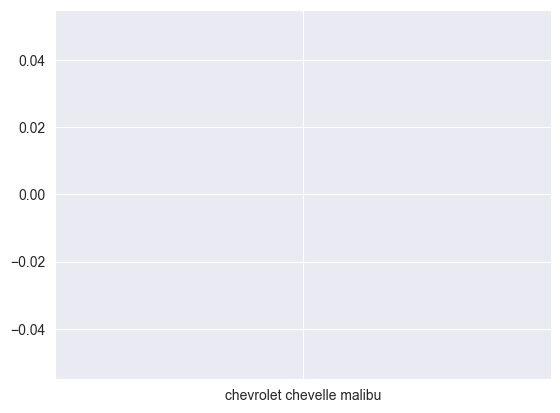

In [32]:
sns.boxplot(x='cylinders', y='mpg', data=cars)
plt.title('MPG by number of cylinders')
plt.show()